In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/JessicaOjo/stage-f-07-heart-failure/master/data/heart_failure_clinical_records_dataset.csv')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
#checking for missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
#basic statistical features of the dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
#correlation between features in the dataset
corr= df.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


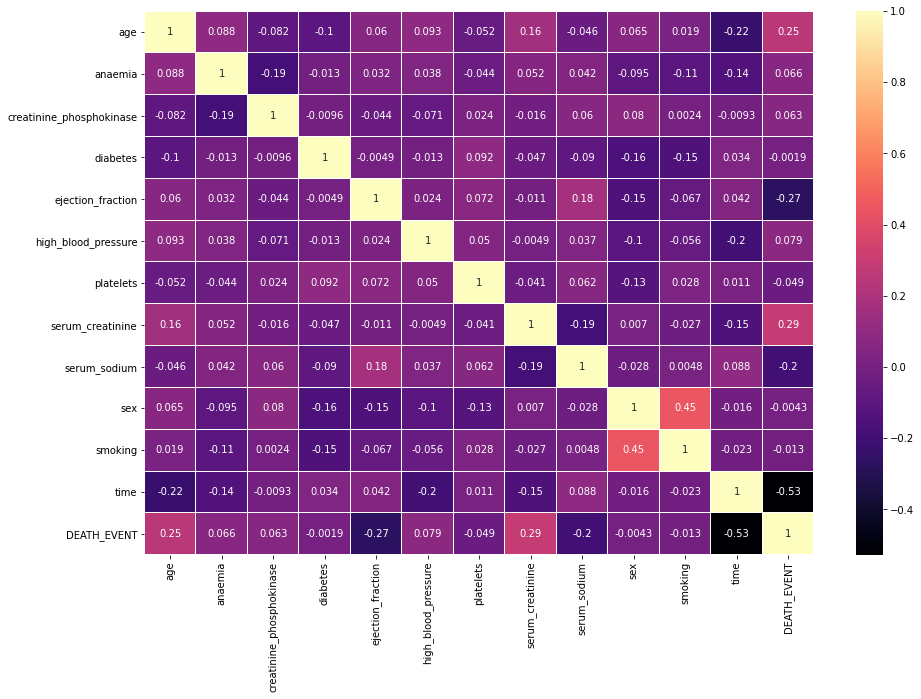

In [7]:
#ploting the correlation coefficient on a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidths=0.05, cmap="magma")

plt.show()

## Data Analysis and Visualization


### Age analysis

In [8]:
#age distribution
df['age'].value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
62.000     5
68.000     5
52.000     5
49.000     4
61.000     4
51.000     4
73.000     4
59.000     4
46.000     3
64.000     3
82.000     3
90.000     3
69.000     3
95.000     2
48.000     2
60.667     2
67.000     2
44.000     2
66.000     2
77.000     2
78.000     2
54.000     2
57.000     2
94.000     1
56.000     1
41.000     1
87.000     1
79.000     1
86.000     1
43.000     1
81.000     1
47.000     1
Name: age, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


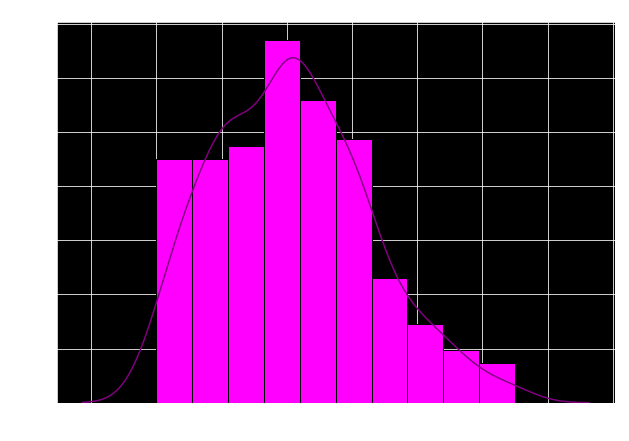

In [9]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.style.use('dark_background')
fig = sns.distplot(df['age'],color='magenta', hist_kws={'edgecolor':'black', 'alpha':1},
                   kde_kws={'color':'purple', 'alpha':1})


plt.title('Age Distribution')
plt.xlabel('Age')


plt.show()

In [10]:
import plotly.express as px
fig = px.histogram(df, x='age', color='DEATH_EVENT', marginal='violin', hover_data=df.columns, 
                   title ='AGE Vs Death Event', 
                   labels={'age': 'AGE'},
                   template='plotly_dark')
fig.show()

###Analysis on Anaemia

In [11]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [12]:
ds = df['anaemia'].value_counts().reset_index()
ds.columns = ['anaemia', 'count']

fig = px.pie(ds, values='count', names="anaemia", title='Anaemia Distribution', width=700, height=500, template='plotly_dark')

fig.show()


In [13]:
anaemia= df[df['anaemia']==1]
no_anaemia= df[df['anaemia']==0]


anaemia_survived = anaemia[df['DEATH_EVENT']==0]
anaemia_not_survived = anaemia[df['DEATH_EVENT']==1]
no_anaemia_survived = no_anaemia[df['DEATH_EVENT']==0]
no_anaemia_not_survived = no_anaemia[df['DEATH_EVENT']==1]

labels = ['Anaemia - Survived','Anaemia - Not Survived', 'No Anaemia - Survived', 'No Anaemia - Not Survived']
values = [len(anaemia[df['DEATH_EVENT']==0]),len(anaemia[df['DEATH_EVENT']==1]),
         len(no_anaemia[df['DEATH_EVENT']==0]),len(no_anaemia[df['DEATH_EVENT']==1])]

import plotly.graph_objs as go
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Anaemia Vs Death Event', template='plotly_dark')
fig.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/us

####Analysis on Creatinine Phosphokinase

In [14]:
df['creatinine_phosphokinase'].value_counts()

582     47
66       4
129      4
84       3
231      3
        ..
395      1
754      1
2334     1
2695     1
514      1
Name: creatinine_phosphokinase, Length: 208, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



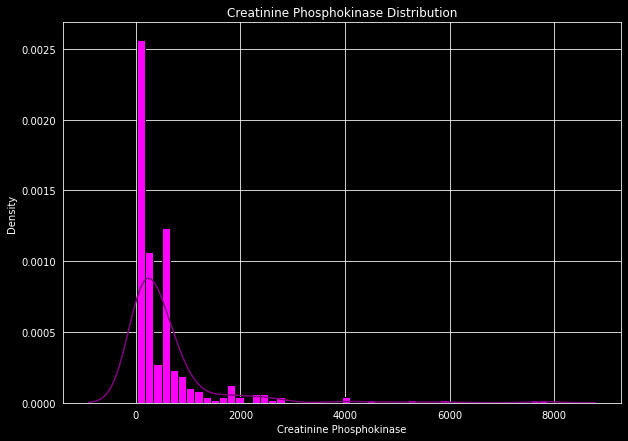

In [15]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.style.use('dark_background')
fig = sns.distplot(df['creatinine_phosphokinase'],color='magenta', hist_kws={'edgecolor':'black', 'alpha':1},
                   kde_kws={'color':'purple', 'alpha':1})


plt.title('Creatinine Phosphokinase Distribution')
plt.xlabel('Creatinine Phosphokinase')


plt.show()

In [16]:
fig = px.histogram(df, x='creatinine_phosphokinase', color='DEATH_EVENT', marginal='violin', hover_data=df.columns, 
                   title ='Creatinine Phosphokinase Vs Death Event', 
                   labels={'creatinine_phosphokinase': 'Creatinine Phosphokinase'},
                   template='plotly_dark')
fig.show()

####Analysis on Diabetes

In [17]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [18]:
dd = df['diabetes'].value_counts().reset_index()
dd.columns = ['diabetes', 'count']

fig = px.pie(dd, values='count', names='diabetes', title='Diabetes Distribution', width=700, height=500, template='plotly_dark')

fig.show()

In [19]:
diabetes= df[df['diabetes']==1]
no_diabetes= df[df['diabetes']==0]


diabetes_survived = diabetes[df['DEATH_EVENT']==0]
diabetes_not_survived = diabetes[df['DEATH_EVENT']==1]
no_diabetes_survived = no_diabetes[df['DEATH_EVENT']==0]
no_diabetes_not_survived = no_diabetes[df['DEATH_EVENT']==1]

labels = ['Diabetes - Survived','Diabetes - Not Survived', 'No Diabetes - Survived', 'No Diabetes - Not Survived']
values = [len(diabetes[df['DEATH_EVENT']==0]),len(diabetes[df['DEATH_EVENT']==1]),
         len(no_diabetes[df['DEATH_EVENT']==0]),len(no_diabetes[df['DEATH_EVENT']==1])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Diabetes Vs Death Event', template='plotly_dark')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/us

####Analysis on Ejection Fraction

In [20]:
df['ejection_fraction'].value_counts()

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
80     1
70     1
65     1
14     1
Name: ejection_fraction, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



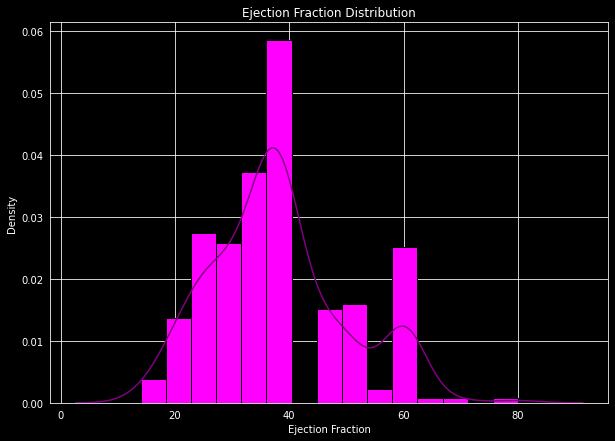

In [21]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.style.use('dark_background')
fig = sns.distplot(df['ejection_fraction'],color='magenta', hist_kws={'edgecolor':'black', 'alpha':1},
                   kde_kws={'color':'purple', 'alpha':1})


plt.title('Ejection Fraction Distribution')
plt.xlabel('Ejection Fraction')


plt.show()

In [22]:
fig = px.histogram(df, x='ejection_fraction', color='DEATH_EVENT', marginal='violin', hover_data=df.columns, 
                   title ='Ejection Fraction Vs Death Event', 
                   labels={'ejection_fraction': 'Ejection Fraction'},
                   template='plotly_dark')
fig.show()

####Analysis on High Blood Pressure

In [23]:
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [24]:
dh = df['high_blood_pressure'].value_counts().reset_index()
dh.columns = ['high_blood_pressure', 'count']

fig = px.pie(dh, values='count', names='high_blood_pressure', title='High Blood Pressure Distribution', width=700, height=500, template='plotly_dark')

fig.show()

In [25]:
high_blood_pressure= df[df['high_blood_pressure']==1]
no_high_blood_pressure= df[df['high_blood_pressure']==0]


high_blood_pressure_survived = high_blood_pressure[df['DEATH_EVENT']==0]
high_blood_pressure_not_survived = high_blood_pressure[df['DEATH_EVENT']==1]
no_high_blood_pressure_survived = no_high_blood_pressure[df['DEATH_EVENT']==0]
no_high_blood_pressure_not_survived = no_high_blood_pressure[df['DEATH_EVENT']==1]

labels = ['High Blood Pressure - Survived','High Blood Pressure - Not Survived', 'No High Blood Pressure - Survived', 'No High Blood Pressure - Not Survived']
values = [len(high_blood_pressure[df['DEATH_EVENT']==0]),len(high_blood_pressure[df['DEATH_EVENT']==1]),
         len(no_high_blood_pressure[df['DEATH_EVENT']==0]),len(no_high_blood_pressure[df['DEATH_EVENT']==1])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='High Blood Pressure Vs Death Event', template='plotly_dark')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/us

####Analysis on Platelets

In [26]:
df['platelets'].value_counts()

263358.03    25
271000.00     4
221000.00     4
255000.00     4
228000.00     4
             ..
330000.00     1
217000.00     1
268000.00     1
358000.00     1
448000.00     1
Name: platelets, Length: 176, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



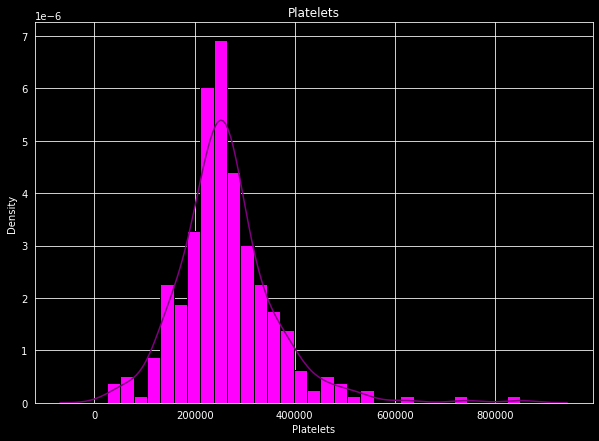

In [27]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.style.use('dark_background')
fig = sns.distplot(df['platelets'],color='magenta', hist_kws={'edgecolor':'black', 'alpha':1},
                   kde_kws={'color':'purple', 'alpha':1})


plt.title('Platelets')
plt.xlabel('Platelets')


plt.show()

In [28]:
fig = px.histogram(df, x='platelets', color='DEATH_EVENT', marginal='violin', hover_data=df.columns, 
                   title ='Platelets Vs Death Event', 
                   labels={'platelets': 'Platelets'},
                   template='plotly_dark')
fig.show()

####Analysis on Serum Creatinine

In [29]:
df['serum_creatinine'].value_counts()

1.00    50
0.90    32
1.10    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.40     9
1.70     9
1.83     8
1.60     6
1.90     5
1.50     5
2.10     5
1.80     4
0.60     4
2.30     3
2.70     3
2.50     3
3.50     2
3.00     2
2.40     2
0.50     1
2.00     1
0.75     1
9.00     1
4.00     1
5.00     1
3.20     1
3.70     1
2.90     1
9.40     1
2.20     1
6.10     1
3.80     1
5.80     1
6.80     1
4.40     1
3.40     1
Name: serum_creatinine, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



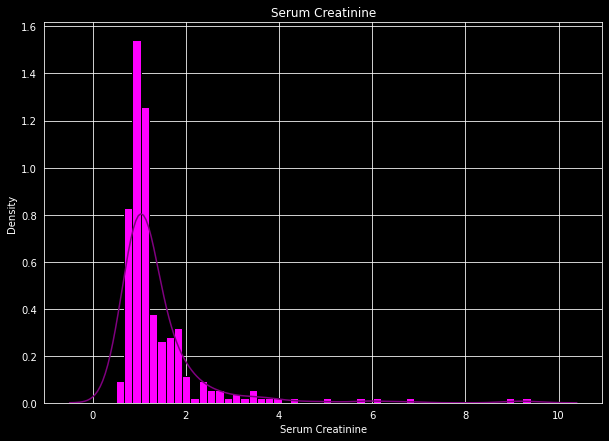

In [30]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.style.use('dark_background')
fig = sns.distplot(df['serum_creatinine'],color='magenta', hist_kws={'edgecolor':'black', 'alpha':1},
                   kde_kws={'color':'purple', 'alpha':1})


plt.title('Serum Creatinine')
plt.xlabel('Serum Creatinine')


plt.show()

In [31]:
fig = px.histogram(df, x='serum_creatinine', color='DEATH_EVENT', marginal='violin', hover_data=df.columns, 
                   title ='Serum Creatinine Vs Death Event', 
                   labels={'serum_creatinine': 'Serum Creatinine'},
                   template='plotly_dark')
fig.show()

####Analysis on Serum Sodium

In [32]:
df['serum_sodium'].value_counts()

136    40
137    38
140    35
134    32
138    23
139    22
135    16
132    14
141    12
142    11
133    10
145     9
130     9
144     5
131     5
143     3
127     3
128     2
129     2
116     1
124     1
121     1
148     1
125     1
126     1
146     1
113     1
Name: serum_sodium, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



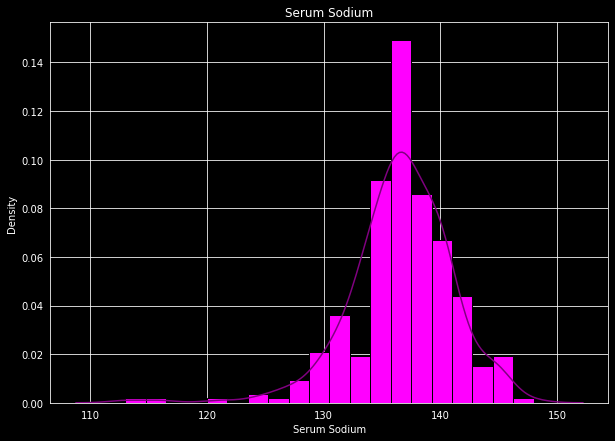

In [33]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.style.use('dark_background')
fig = sns.distplot(df['serum_sodium'],color='magenta', hist_kws={'edgecolor':'black', 'alpha':1},
                   kde_kws={'color':'purple', 'alpha':1})


plt.title('Serum Sodium')
plt.xlabel('Serum Sodium')


plt.show()

In [34]:
fig = px.histogram(df, x='serum_sodium', color='DEATH_EVENT', marginal='violin', hover_data=df.columns, 
                   title ='Serum Sodium Vs Death Event', 
                   labels={'serum_sodium': 'Serum Sodium'},
                   template='plotly_dark')
fig.show()

####Analysis on Gender(Sex)

In [35]:
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

This shows that there are more males to females with males having 64.9% of the total population and females having 35.1% as shown below

In [36]:
male= round(((len(df[df['sex']==1]))/(len(df['sex']))*100), 2)
female= round(((len(df[df['sex']==0]))/(len(df['sex']))*100), 2)
print(male, female)

64.88 35.12


In [37]:
dg = df['sex'].value_counts().reset_index()
dg.columns = ['sex', 'count']

fig = px.pie(dg, values='count', names='sex', title='Gender Distridution', width=700, height=500, template='plotly_dark')

fig.show()

In [38]:
male= df[df['sex']==1]
female= df[df['sex']==0]


male_survived = male[df['DEATH_EVENT']==0]
male_not_survived = male[df['DEATH_EVENT']==1]
female_survived = female[df['DEATH_EVENT']==0]
female_not_survived = female[df['DEATH_EVENT']==1]

labels = ['Male - Survived','Male- Not Survived', 'Female - Survived', 'Female - Not Survived']
values = [len(male[df['DEATH_EVENT']==0]),len(male[df['DEATH_EVENT']==1]),
         len(female[df['DEATH_EVENT']==0]),len(female[df['DEATH_EVENT']==1])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Gender Vs Death Event', template='plotly_dark')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/us

####Analysis on Smoking

In [39]:
df['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [40]:
dn = df['smoking'].value_counts().reset_index()
dn.columns = ['smoking', 'count']

fig = px.pie(dn, values='count', names='smoking', title='Smoking Distridution', width=700, height=500, template='plotly_dark')

fig.show()

In [41]:
smoking= df[df['smoking']==1]
not_smoking= df[df['smoking']==0]


smoking_survived = smoking[df['DEATH_EVENT']==0]
smoking_not_survived = smoking[df['DEATH_EVENT']==1]
not_smoking_survived = not_smoking[df['DEATH_EVENT']==0]
not_smoking_not_survived = not_smoking[df['DEATH_EVENT']==1]

labels = ['Smoking - Survived','Smoking - Not Survived', 'Not Smoking - Survived', 'Not Smoking - Not Survived']
values = [len(smoking[df['DEATH_EVENT']==0]),len(smoking[df['DEATH_EVENT']==1]),
         len(not_smoking[df['DEATH_EVENT']==0]),len(not_smoking[df['DEATH_EVENT']==1])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Smoking Vs Death Event', template='plotly_dark')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/us